# Introduction to Deep Learning in Python - Datacamp, Dan Becker
Notes by César.  


In [1]:
# Import pandas
import pandas as pd

# Import the course datasets 
url_1="https://raw.githubusercontent.com/cmuro27/Machine_Learning_Projects_and_Notes/main/datasets/hourly_wages.csv"
url_2="https://raw.githubusercontent.com/cmuro27/Machine_Learning_Projects_and_Notes/main/datasets/titanic_all_numeric.csv"
wages = pd.read_csv(url_1)
titanic = pd.read_csv(url_2)

## Basics of neural networks and deep learning  

Neural networks accounts for interactions.  
We have something called an *input layer*. This represents our predictive features. On the far right we have the *output layer*. The prediction from our model. All layers that are not the input or output layers are named *hidden layers*. More nodes or neurons in the hidden layers, then more interactions.   
  
They are called hidden layers because, while the inputs and outputs correspond to visible things that happened in the world, and they can be stored as data, the values in the hidden layer aren't something we have data about, or anything we observe directly from the world. Nevertheless, each dot, called a node, in the hidden layer, represents an aggregation of information 

**Forward propagation**   
How neural networks makes predicitons is called forward propagation algorithm.  
* Multiply ad process at the jth layer with the ith neuron: $\vec{w}_{j}^{[i]}\cdot \vec{x}^{i-1}+b^{[i]}_{j}$
* Forward propagation for one data point at time
* Output is the prediciton for the data point

**Coding the forward propagation algorithm**

In [2]:
import numpy as np
weights={'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}
input_data=np.array([3, 5])
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data*weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs*weights['output']).sum()

# Print output
print(output)

-39


It looks like the network generated a prediction of -39.

**Activition functions**
For neural networks to achieve their maximum predictive power, we must apply something called an activation function in the hidden layers. An activation function allows the model to capture non-linearities.
* Applied to node inputs to produce node output
* Usually, the activation function is th sigmoid function, which is a simple hyperbolic tangent  

An "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks.
$$f(x)=max(x,0)$$
This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive. 

In [7]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


You predicted 52 transactions. Without this activation function, you would have predicted a negative number! The real power of activation functions will come soon when you start tuning model weights.

You'll now define a function called predict_with_network() which will generate predictions for multiple data observations, which are pre-loaded as input_data. As before, weights are also pre-loaded. In addition, the relu() function you defined in the previous exercise has been pre-loaded.

In [9]:
import numpy as np
input_data=[np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights={'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row*weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (node_0_output*weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs*weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row,weights))

# Print results
print(results)     

[52, 0, 0, 64]


**Deeper networks**  
 In practice, it's becoming common to have neural networks that have many, many layers; five layers, ten layers. A few years ago 15 layers was state of the art but this can scale quite naturally to even a thousand layers. 
* Deep networks internally build represantations of patterns in the data 
* Partially, replace the need for feature engineering
* Deep learning is also sometimes called representation learning, because subsequent layers build
* Subsequente layers build increasingly sophiscated representations of raw data
* Modeler does not need to specify the interactions 
* Neural networks find relevant patterns to make better predictions 
* The last layers capture the most complex interactions 

In [2]:
import numpy as np

def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

input_data=np.array([3, 5])  
weights={'node_0_0': np.array([2, 4]),
 'node_0_1': np.array([ 4, -5]),
 'node_1_0': np.array([-1,  2]),
 'node_1_1': np.array([1, 2]),
 'output': np.array([2, 7])}
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data*weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs*weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs*weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs*weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


## Optimizing a neural network with backward propagation  
The loss function measures the error. We want to minimize this function to get the best model parameters that fits our data.  
* Lower loss mean function means a better model  
* Goal: Find the weights that give the lowest value for the loss function  
* This is the Gradient Descent process.  

**Backward propagation**
It is to calculate the slopes you need to optimize more complex deep learning models.   
* Just as forward propagation sends input data through the hidden layers and into the output layer, back propagation takes the error from the output layer and propagates it backward through the hidden layers, towards the input layer.  
* It calculates the necessary slopes sequentially from the weights closest to the prediction, through the hidden layers, eventually back to the weights coming from the inputs. We then use these slopes to update our weights as you've seen. 
  
The process is the following:  
* Do forward propagation to calculate predictions and errors  
* Go one back layer at time 
* Every weight feeds from some input node into some output node
* Gradients for weight is product of: 
    1. Node value feeding into that weight
    2. Slope of loss function wrt node it feeds into
    3. Slope of activation function at the node it feeds into
* Need to also keep track of the slopes of the loss function respect node values
* Slope of node values are the sum of the slopes for all weights that come out of them

**Sthochastic gradient descent**  
* It is common only to calculate the slope on a only subset of the data (batch)
* Use a different batch of data to calculate the next update
* Star over from the beginning once all the data is used
* Each time through the training data is called epoch
* When slopes are calculated on one batch at time: stochastic gradient descent

## Building deep learning models in keras  


**Model building steps**
* Specify architecture
* Compile
* Fit
* Predict
  


**Model specification**    
import numpy as np
from tensorflow.keras.layers import Dense  
from tensorflow.keras.models import Sequential  
  
predictors=np.loadtxt('predictors_data.csv',delimiter=',')  
n_cols=predictors.shape[1]  
  
model=Sequential()  
model.add(Dense(100,activation='relu',input_shape=(n_cols,)))  
model.add(Dense(100,activation='relu'))  
model.add(Dense(1))  

To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.

As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience. You can find the dataset in a pandas DataFrame called df. For convenience, everything in df except for the target has been converted to a NumPy array called predictors. The target, wage_per_hour, is available as a NumPy array called target.

In [19]:
target=wages.wage_per_hour.values
predictors=wages.drop("wage_per_hour",axis=1).values  
# Import necessary modules
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32,activation='relu'))

# Add the output layer
model.add(Dense(1))

**Compiling and fitting the model**  
The compile method has two important arguments for you to choose,  
* Specify the optimizer which controls the learning rate. "Adam" is usually a good choice, it adjusts the learning rate as it does gradient descent
* The loss function. mean_squared_error is the most common choice
  
After that...
Fitting!  
* Applying backpropagation and gradient descent with your data to update weights.
* Scaling all the data before fitting can ease optimization

In [20]:
# Import necessary modules
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

model.fit(predictors,target)

Loss function: mean_squared_error
17/17 [==============================] - 0s 1ms/step - loss: 26.7871


**Classification**
* 'categorical_crossestropy' as loss function.
* For this function a lower score is better. But better add metrics=['accuracy'] to compile step for easy to understand diagnostics.
* We need to modify the last layer, so it has a separate node for each potential outcome. Then use 'softmax' activation. It ensuere the predictions sum to 1, so they can be interpreted as probabilities

In [21]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   survived                   891 non-null    int64  
 1   pclass                     891 non-null    int64  
 2   age                        891 non-null    float64
 3   sibsp                      891 non-null    int64  
 4   parch                      891 non-null    int64  
 5   fare                       891 non-null    float64
 6   male                       891 non-null    int64  
 7   age_was_missing            891 non-null    bool   
 8   embarked_from_cherbourg    891 non-null    int64  
 9   embarked_from_queenstown   891 non-null    int64  
 10  embarked_from_southampton  891 non-null    int64  
dtypes: bool(1), float64(2), int64(8)
memory usage: 70.6 KB
None


In [24]:
print(titanic.describe())

         survived  ...  embarked_from_southampton
count  891.000000  ...                 891.000000
mean     0.383838  ...                   0.722783
std      0.486592  ...                   0.447876
min      0.000000  ...                   0.000000
25%      0.000000  ...                   0.000000
50%      0.000000  ...                   1.000000
75%      1.000000  ...                   1.000000
max      1.000000  ...                   1.000000

[8 rows x 10 columns]


In [38]:
print(to_categorical(titanic.survived).shape)
print(predictors.shape)


(891, 2)
(891, 10)


In [42]:
# Import necessary modules
# Import necessary modules
import numpy as np
predictors=titanic.drop("survived",axis=1).values.astype(np.float32)
target = to_categorical(titanic.survived)
n_cols=predictors.shape[1]

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Convert the target to categorical: target


# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32,activation='relu',input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2,activation='softmax'))

# Compile the model
model.compile(optimizer="sgd",loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
model.fit(predictors,target)

28/28 [==============================] - 0s 977us/step - loss: 4.1108 - accuracy: 0.5836


Fantastic! This simple model is generating an accuracy of 60%!

## Using models  
* Save
* Reload
* Make predictions
  
from tensorflow.keras.models import load_model  
model.save('model_file.h5')  
my_model=load_model('model_file.h5')  
predictions=my_model.predict(data_to_predict_with)    
probability_true=predictions[:,1]  

Making predictions

The trained network from your previous coding exercise is now stored as model. New data to make predictions is stored in a NumPy array as pred_data. Use model to make predictions on your new data.

In [6]:
import numpy as np
pred_data=np.array([[  2.      ,  34.      ,   0.      ,   0.      ,  13.      ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,  31.      ,   1.      ,   1.      ,  26.25    ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  11.      ,   1.      ,   2.      , 120.      ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,   0.42    ,   0.      ,   1.      ,   8.5167  ,
          1.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  27.      ,   0.      ,   0.      ,   6.975   ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  31.      ,   0.      ,   0.      ,   7.775   ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  39.      ,   0.      ,   0.      ,   0.      ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  18.      ,   0.      ,   0.      ,   7.775   ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,  39.      ,   0.      ,   0.      ,  13.      ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  33.      ,   1.      ,   0.      ,  53.1     ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  26.      ,   0.      ,   0.      ,   7.8875  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  39.      ,   0.      ,   0.      ,  24.15    ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,  35.      ,   0.      ,   0.      ,  10.5     ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,   6.      ,   4.      ,   2.      ,  31.275   ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  30.5     ,   0.      ,   0.      ,   8.05    ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  29.699118,   0.      ,   0.      ,   0.      ,
          1.      ,   1.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  23.      ,   0.      ,   0.      ,   7.925   ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,  31.      ,   1.      ,   1.      ,  37.0042  ,
          1.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  43.      ,   0.      ,   0.      ,   6.45    ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  10.      ,   3.      ,   2.      ,  27.9     ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  52.      ,   1.      ,   1.      ,  93.5     ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  27.      ,   0.      ,   0.      ,   8.6625  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  38.      ,   0.      ,   0.      ,   0.      ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  27.      ,   0.      ,   1.      ,  12.475   ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,   2.      ,   4.      ,   1.      ,  39.6875  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  29.699118,   0.      ,   0.      ,   6.95    ,
          1.      ,   1.      ,   0.      ,   1.      ,   0.      ],
       [  3.      ,  29.699118,   0.      ,   0.      ,  56.4958  ,
          1.      ,   1.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,   1.      ,   0.      ,   2.      ,  37.0042  ,
          1.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  29.699118,   0.      ,   0.      ,   7.75    ,
          1.      ,   1.      ,   0.      ,   1.      ,   0.      ],
       [  1.      ,  62.      ,   0.      ,   0.      ,  80.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  3.      ,  15.      ,   1.      ,   0.      ,  14.4542  ,
          0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  2.      ,   0.83    ,   1.      ,   1.      ,  18.75    ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  29.699118,   0.      ,   0.      ,   7.2292  ,
          1.      ,   1.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  23.      ,   0.      ,   0.      ,   7.8542  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  18.      ,   0.      ,   0.      ,   8.3     ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  39.      ,   1.      ,   1.      ,  83.1583  ,
          0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  21.      ,   0.      ,   0.      ,   8.6625  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  29.699118,   0.      ,   0.      ,   8.05    ,
          1.      ,   1.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  32.      ,   0.      ,   0.      ,  56.4958  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  29.699118,   0.      ,   0.      ,  29.7     ,
          1.      ,   1.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  20.      ,   0.      ,   0.      ,   7.925   ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,  16.      ,   0.      ,   0.      ,  10.5     ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  30.      ,   0.      ,   0.      ,  31.      ,
          0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  34.5     ,   0.      ,   0.      ,   6.4375  ,
          1.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  17.      ,   0.      ,   0.      ,   8.6625  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  42.      ,   0.      ,   0.      ,   7.55    ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  29.699118,   8.      ,   2.      ,  69.55    ,
          1.      ,   1.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  35.      ,   0.      ,   0.      ,   7.8958  ,
          1.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  2.      ,  28.      ,   0.      ,   1.      ,  33.      ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  29.699118,   1.      ,   0.      ,  89.1042  ,
          0.      ,   1.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,   4.      ,   4.      ,   2.      ,  31.275   ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  74.      ,   0.      ,   0.      ,   7.775   ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,   9.      ,   1.      ,   1.      ,  15.2458  ,
          0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  1.      ,  16.      ,   0.      ,   1.      ,  39.4     ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,  44.      ,   1.      ,   0.      ,  26.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  18.      ,   0.      ,   1.      ,   9.35    ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  45.      ,   1.      ,   1.      , 164.8667  ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  51.      ,   0.      ,   0.      ,  26.55    ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  24.      ,   0.      ,   3.      ,  19.2583  ,
          0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  29.699118,   0.      ,   0.      ,   7.2292  ,
          1.      ,   1.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  41.      ,   2.      ,   0.      ,  14.1083  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,  21.      ,   1.      ,   0.      ,  11.5     ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  48.      ,   0.      ,   0.      ,  25.9292  ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  29.699118,   8.      ,   2.      ,  69.55    ,
          0.      ,   1.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,  24.      ,   0.      ,   0.      ,  13.      ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,  42.      ,   0.      ,   0.      ,  13.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,  27.      ,   1.      ,   0.      ,  13.8583  ,
          0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  1.      ,  31.      ,   0.      ,   0.      ,  50.4958  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  29.699118,   0.      ,   0.      ,   9.5     ,
          1.      ,   1.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,   4.      ,   1.      ,   1.      ,  11.1333  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  26.      ,   0.      ,   0.      ,   7.8958  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  47.      ,   1.      ,   1.      ,  52.5542  ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  33.      ,   0.      ,   0.      ,   5.      ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  47.      ,   0.      ,   0.      ,   9.      ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,  28.      ,   1.      ,   0.      ,  24.      ,
          0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  15.      ,   0.      ,   0.      ,   7.225   ,
          0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  20.      ,   0.      ,   0.      ,   9.8458  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  19.      ,   0.      ,   0.      ,   7.8958  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  29.699118,   0.      ,   0.      ,   7.8958  ,
          1.      ,   1.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  56.      ,   0.      ,   1.      ,  83.1583  ,
          0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  2.      ,  25.      ,   0.      ,   1.      ,  26.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  33.      ,   0.      ,   0.      ,   7.8958  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  22.      ,   0.      ,   0.      ,  10.5167  ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,  28.      ,   0.      ,   0.      ,  10.5     ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  25.      ,   0.      ,   0.      ,   7.05    ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  39.      ,   0.      ,   5.      ,  29.125   ,
          0.      ,   0.      ,   0.      ,   1.      ,   0.      ],
       [  2.      ,  27.      ,   0.      ,   0.      ,  13.      ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  19.      ,   0.      ,   0.      ,  30.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  29.699118,   1.      ,   2.      ,  23.45    ,
          0.      ,   1.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  26.      ,   0.      ,   0.      ,  30.      ,
          1.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  32.      ,   0.      ,   0.      ,   7.75    ,
          1.      ,   0.      ,   0.      ,   1.      ,   0.      ]],
      dtype=np.float32)

In [7]:
# Specify, compile, and fit the model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

import numpy as np
predictors=titanic.drop("survived",axis=1).values.astype(np.float32)
target = to_categorical(titanic.survived)
n_cols=predictors.shape[1]


model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# Print predicted_prob_true
print(predicted_prob_true)

2023-02-10 20:44:10.326159: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-10 20:44:10.326182: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-10 20:44:10.326200: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (81571eb2-e43a-4af8-9196-06645585934b): /proc/driver/nvidia/version does not exist
2023-02-10 20:44:10.326432: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


3/3 [==============================] - 0s 1ms/step
[0.89903545 0.9873754  0.99999994 0.7256456  0.79595697 0.82457614
 0.80100083 0.7893369  0.9042819  0.9999624  0.80296797 0.978068
 0.86450136 0.99515736 0.82606095 0.7913013  0.8218883  0.99801016
 0.8548541  0.989624   0.99999994 0.8162313  0.7948997  0.88613206
 0.99870193 0.80256206 0.99998254 0.9985419  0.8136764  0.9999996
 0.8910401  0.94298625 0.8485126  0.78223234 0.7591281  0.99999994
 0.77944607 0.86215436 0.9999687  0.99568236 0.7610588  0.8124938
 0.9965125  0.8162964  0.7643757  0.86331254 0.9999985  0.8370561
 0.9959861  0.99999994 0.99331737 0.9416565  0.9082757  0.9995155
 0.98648673 0.8071901  0.99999994 0.98896915 0.94325733 0.8485126
 0.90207905 0.8234772  0.9899656  0.99999887 0.8791681  0.9300592
 0.89547133 0.9999164  0.8768835  0.77369344 0.8030436  0.9999313
 0.77110434 0.89249355 0.98243195 0.75636524 0.80302304 0.75389034
 0.8605038  0.9999998  0.9886588  0.83422434 0.8564964  0.84740454
 0.7876065  0.983409

## Fine-tuning keras model

* Updates may not improve the model meaningfully
* Updates too small (if learning rate is small) or too large (if learning rate is high)
  
* The easiest way to see the effect of different learning rates is to use the simplest optimizer.  
* The *dying neuron problem*: It occurs when a neuron takes a value less than 0 for all rows of your data. Recall that ReLu activation gets 0 when input is a negative value...  
* Using the sigmoid function. The values outside the middle are relatively flat or had small slopes. Then many layers have very small slopes.
* In deep networks, updates back to propagation were close to zero. This is called the *vanishing gradient problem*.   

Changing optimization parameters

It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

In [14]:
#Stochastic gradient descent  
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

predictors=titanic.drop("survived",axis=1).values.astype(np.float32)
target = to_categorical(titanic.survived)
n_cols=predictors.shape[1]

def get_new_model(input_shape):
    model=Sequential()
    input_shape=(predictors.shape[1],)
    model.add(Dense(100,activation="relu",input_shape=input_shape))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(2,activation='softmax'))
    return(model)

lr_to_test=[0.000001,0.01,1]
input_shape=(predictors.shape[1],)

for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    model=get_new_model(input_shape)
    my_optimizer=SGD(lr=lr)
    model.compile(optimizer=my_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    # Fit the model
    model.fit(predictors,target)
    



Testing model with learning rate: 0.000001

28/28 [==============================] - 0s 1ms/step - loss: 1.5098 - accuracy: 0.3883


Testing model with learning rate: 0.010000

28/28 [==============================] - 0s 1ms/step - loss: 1.3469 - accuracy: 0.6285


Testing model with learning rate: 1.000000

28/28 [==============================] - 0s 1ms/step - loss: 5318389970354831360.0000 - accuracy: 0.5881


## Model validation  
* We use validation data to test model performance
* Commonly use validation split rather than cross validation since we employ large datasets  
* Single validation score is based on large amount of data, and is reliable  
  
We specify the split using the keyword argument validation_split when calling the fit method.  Suppose we have a classification problem:     
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])  
model.fit(predictors,target,validation_split=0.3)  
  
Our goal is to have the best validation score possible, so we should keep training while validation score is improving, and then stop training when the validation score isn't improving. We do this with something called "early stopping." We can use early stopping with only some small changes to the code. 
  
**Early stopping**  
from tensorflow.keras.callbacks import EarlyStopping  
early_stopping_monitor=EarlyStopping(patience=2)  
model.fit(predictors,target,validation_split=0.3,epochs=20,callbacks=[early_stopping_monitor])  

Evaluating model accuracy on validation dataset

Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

In [2]:
#Stochastic gradient descent  
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

predictors=titanic.drop("survived",axis=1).values.astype(np.float32)
target = to_categorical(titanic.survived)

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors,target,validation_split=0.3)

2023-02-11 02:53:29.986269: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-11 02:53:29.986307: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-11 02:53:31.831131: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-11 02:53:31.831154: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-11 02:53:31.831174: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9847d3a7-57b4-404b-a877-78247bda865a): /proc/driver/nvidia/version does not exist
2023-02-11 02:53:31.831399: I tensorflow

20/20 [==============================] - 1s 10ms/step - loss: 0.8313 - accuracy: 0.6533 - val_loss: 0.6444 - val_accuracy: 0.6679


Early stopping: Optimizing the optimization

Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to .fit()

In [5]:
# Import EarlyStopping
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

predictors=titanic.drop("survived",axis=1).values.astype(np.float32)
target = to_categorical(titanic.survived)

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

from tensorflow.keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model_1 = Sequential()
model_1.add(Dense(100, activation='relu', input_shape = input_shape))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(2, activation='softmax'))

# Compile the model
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model_1.fit(predictors,target,validation_split=0.3,epochs=30,callbacks=[early_stopping_monitor])

Epoch 1/30
20/20 [==============================] - 0s 9ms/step - loss: 1.3659 - accuracy: 0.5811 - val_loss: 0.6338 - val_accuracy: 0.7239
Epoch 2/30
20/20 [==============================] - 0s 3ms/step - loss: 0.7191 - accuracy: 0.6372 - val_loss: 0.5753 - val_accuracy: 0.7164
Epoch 3/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.6485 - val_loss: 0.6511 - val_accuracy: 0.6716
Epoch 4/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6348 - accuracy: 0.6533 - val_loss: 0.5612 - val_accuracy: 0.7276
Epoch 5/30
20/20 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.6806 - val_loss: 0.5719 - val_accuracy: 0.6940
Epoch 6/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.6629 - val_loss: 0.5233 - val_accuracy: 0.7276
Epoch 7/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.6613 - val_loss: 0.5208 - val_accuracy: 0.7276
Epoch 8/30
20/20 [==

Experimenting with wider networks

Now you know everything you need to begin experimenting with different models!

A model called model_1 has been pre-loaded. You can see a summary of this model printed in the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.

In this exercise you'll create a new model called model_2 which is similar to model_1, except it has 100 units in each hidden layer.

After you create model_2, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument verbose=False in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.

Because you are fitting two models, it will take a moment to see the outputs after you hit run, so be patient.

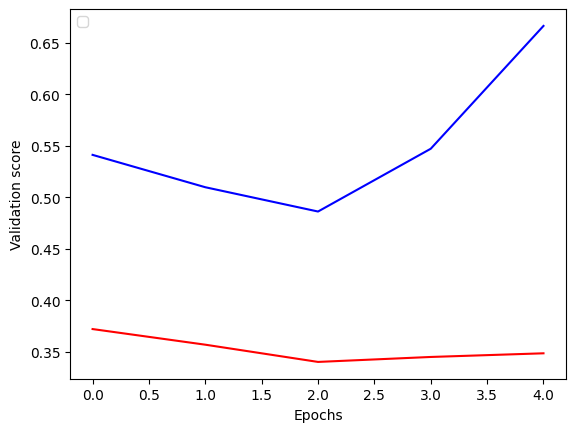

In [26]:
# Define early_stopping_monitor
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100,activation='relu'))

# Add the output layer
model_2.add(Dense(2,activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r')
plt.plot(model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend(loc="upper left")
plt.show()

Adding layers to a network

You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 10 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 10 units in each layer).

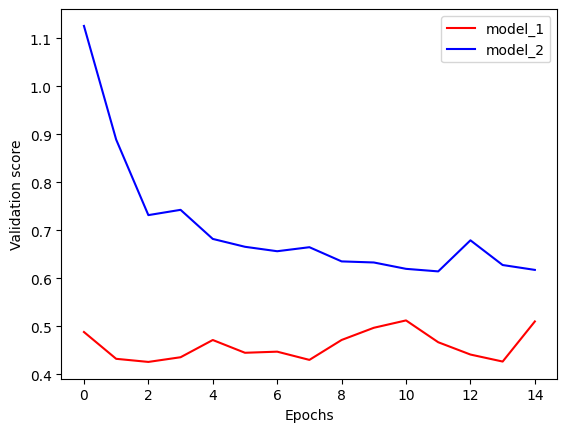

In [ ]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(10,activation='relu',input_shape=input_shape))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))

# Add the output layer
model_2.add(Dense(2,activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.4, verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.4, verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r',label='model_1')
plt.plot(model_2_training.history['val_loss'], 'b',label='model_2')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.ylabel('Validation score')
plt.show()

**Thinking about model capacity**  
"Model capacity" should be one of the key considerations you think about when deciding what models to try."Model capacity" or "network capacity" is closely related to the terms overfitting and underfitting.  
  
Our validation score, is the ultimate measure of a model's predictive quality.
  
  Model capacity is a model's ability to capture predictive patterns in your data.  
*  If you had a network, and you increased the number of nodes or neurons in a hidden layer, that would increase model capacity. And if you add layers, that increases capacity.  
  
**Workflow for optimizing model capacity**
* Start with a small network  
* Gradually increase capacity
* Keep increasing capacity until validation score is no longer improving

## Stepping up images  
Using the famous MNIST dataset. 
  
Building your own digit recognition model

We've already done the basic manipulation of the MNIST dataset shown in the video, so you have X and y loaded and ready to model with. Sequential and Dense from tensorflow.keras are also pre-imported.

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a blog post by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.

In [31]:
from keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels)=mnist.load_data()
print("The shape of the train data is: ", train_images.shape)
print("The shape of the test data is: ",test_images.shape)

# Preparing the image data. preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. Previously, our training images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1. 

train_images=train_images.reshape((60000, 28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

# Preparing the model
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5,batch_size=128)


The shape of the train data is:  (60000, 28, 28)
The shape of the test data is:  (10000, 28, 28)
Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2606 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1034 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0688 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0500 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0382 - accuracy: 0.9886


In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc: ',test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0619 - accuracy: 0.9809
test_acc:  0.98089998960495
